# Configuration

In [8]:
from SPARQLWrapper import SPARQLWrapper, JSON
from utils import SPARQL_to_df
from FAIR import findability, accessibility, interoperability, reusability
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
connection = SPARQLWrapper("https://data.europa.eu/sparql")

In [4]:
PREFIXES = """
    PREFIX dcat: <http://www.w3.org/ns/dcat#>
    PREFIX odp:  <http://data.europa.eu/euodp/ontologies/ec-odp#>
    PREFIX dct: <http://purl.org/dc/terms/>
    PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
    PREFIX foaf: <http://xmlns.com/foaf/0.1/>
    PREFIX void: <http://rdfs.org/ns/void#>
"""

## Sample query

In [4]:
query = """
    SELECT DISTINCT ?p WHERE {
        SELECT * WHERE {
        ?d a dcat:Dataset .
        ?d ?p ?o .
      }
      LIMIT 5000
    }
    """

df = SPARQL_to_df(connection, query, PREFIXES)

In [5]:
df.head()

,p
0,http://www.w3.org/1999/02/22-rdf-syntax-ns#type


In [6]:
accessibility.is_url_ok(df.p[0])

True

In [7]:
df[df.p.str.startswith("http://rdfs.org/ns/void#")]

,p


No void vocabulary in the dataset

In [8]:
datasets_query = """
    SELECT ?d WHERE {
        SELECT * WHERE {
        ?d a dcat:Dataset .
      }
      LIMIT 5000
    }
    """

distr_links = accessibility.distribution_links(connection, datasets_query, PREFIXES)

In [9]:
distr_links.head()

,dataset,distribution,accessURL,downloadURL
0,http://data.europa.eu/88u/dataset/22984271-bun...,http://data.europa.eu/88u/distribution/1265c36...,https://dam-api.bfs.admin.ch/hub/api/dam/asset...,https://dam-api.bfs.admin.ch/hub/api/dam/asset...
1,http://data.europa.eu/88u/dataset/22984271-bun...,http://data.europa.eu/88u/distribution/882c468...,https://dam-api.bfs.admin.ch/hub/api/dam/asset...,https://dam-api.bfs.admin.ch/hub/api/dam/asset...
2,http://data.europa.eu/88u/dataset/22984271-bun...,http://data.europa.eu/88u/distribution/8bf3489...,https://dam-api.bfs.admin.ch/hub/api/dam/asset...,https://dam-api.bfs.admin.ch/hub/api/dam/asset...
3,http://data.europa.eu/88u/dataset/22984271-bun...,http://data.europa.eu/88u/distribution/d31eb28...,https://dam-api.bfs.admin.ch/hub/api/dam/asset...,https://dam-api.bfs.admin.ch/hub/api/dam/asset...
4,http://data.europa.eu/88u/dataset/https-dane-g...,http://data.europa.eu/88u/distribution/e627608...,https://dane.gov.pl/pl/dataset/2783/resource/3...,"https://api.dane.gov.pl/resources/39657,umowy-..."


In [10]:
distr_agg = distr_links.groupby("distribution").agg({"accessURL": "count", "downloadURL": "count"}).sort_values(["accessURL", "downloadURL"], ascending=False)
distr_agg['ratio'] = distr_agg.downloadURL / distr_agg.accessURL
distr_agg

,accessURL,downloadURL,ratio
distribution,,,
http://data.europa.eu/88u/distribution/c2a8034e-6e4c-4193-855f-69f18d6bd41d,222,222,1.0
http://data.europa.eu/88u/distribution/92faea4e-8a42-4253-b22c-fea0413bc9d1,23,23,1.0
http://data.europa.eu/88u/distribution/a723e418-eb26-4f19-8708-2442b2b4680f,23,23,1.0
http://data.europa.eu/88u/distribution/e8f585b1-96a1-413b-a6a0-1ba6dd8080b2,4,0,0.0
http://data.europa.eu/88u/distribution/bd5ea88f-112b-497d-8e86-e40bd747aed7,2,2,1.0
...,...,...,...
http://data.europa.eu/88u/distribution/fff8b4c6-e771-4c90-bb38-58ece19b2aff,1,0,0.0
http://data.europa.eu/88u/distribution/fffc3456-c3b4-4e85-b861-eff9c006fd30,1,0,0.0
http://data.europa.eu/88u/distribution/08671b71-0c31-4d03-a6ed-d8c9c5bab658,0,0,NaN


In [11]:
distr_agg = distr_links.groupby("dataset").agg({"accessURL": "count", "downloadURL": "count", "distribution": "count"}).sort_values(["accessURL", "downloadURL"], ascending=False)
distr_agg['ratio'] = distr_agg.downloadURL / (distr_agg.accessURL.apply(lambda x: x or 1))
distr_agg

,accessURL,downloadURL,distribution,ratio
dataset,,,,
http://data.europa.eu/88u/dataset/https-www-dov-vlaanderen-be-dataset-e5a46140-137f-4f67-87cd-9c359ebbdfd2,225,225,225,1.0
http://data.europa.eu/88u/dataset/organogram-hm-revenue-and-customs,73,0,73,0.0
http://data.europa.eu/88u/dataset/39c7626b-44f6-4ce2-a12c-5a1438237c7a,46,46,46,1.0
http://data.europa.eu/88u/dataset/dc9159e7-88d1-43b4-a952-1b75dfb1041f,23,23,23,1.0
http://data.europa.eu/88u/dataset/https-opendata-ugr-es-dataset-3adf9739-092d-4ed8-8643-87a48e2453d0,21,0,21,0.0
...,...,...,...,...
http://data.europa.eu/88u/dataset/spasitnaadmloc_pol_redesreser-xml~~1,0,0,0,0.0
http://data.europa.eu/88u/dataset/spasitnaagricu_pol_regviticola_f13t14-xml~~1,0,0,0,0.0
http://data.europa.eu/88u/dataset/spasitnapoluci_sym_apcvamb-xml~~1,0,0,0,0.0


In [12]:
distr_agg[distr_agg.accessURL != distr_agg.distribution]

,accessURL,downloadURL,distribution,ratio
dataset,,,,
http://data.europa.eu/88u/dataset/250cc292-efee-4df4-a74d-ec7d84464bea,0,0,1,0.0
http://data.europa.eu/88u/dataset/8a72e27f-c065-5365-af42-6b05fffa0d63,0,0,1,0.0
http://data.europa.eu/88u/dataset/99602f78-f90a-5f19-b168-799e2d371ea2,0,0,1,0.0


In [13]:
datasets_query = """
    SELECT ?d WHERE {
        SELECT * WHERE {
        ?d a dcat:Dataset .
      }
      LIMIT 5000
    }
    """

author_info = reusability.publisher_provenance_contant(connection, datasets_query, PREFIXES)

In [14]:
(~author_info.drop_duplicates("dataset").isnull()).mean()

dataset       1.0000
publisher     0.3398
provenance    0.3800
contact       0.8496
dtype: float64

### Findability properties

In [18]:
findability_query = """
SELECT * WHERE{
    ?datasetURI a dcat:Dataset;
    dct:publisher/rdfs:label|dct:publisher/skos:prefLabel ?publisher;
    dcat:theme <http://publications.europa.eu/resource/authority/data-theme/ENVI>.
    FILTER (LANG(?publisher) = "" || LANG(?publisher) = "en") .
} LIMIT 1500
"""

In [19]:
df = findability.findability_properties(connection, findability_query, PREFIXES)

In [20]:
df['keywords'] = df['keywords'].astype(np.int64)

In [21]:
df.head()

,datasetURI,publisher,englishTitle,keywords,issuedDate,datasetType,datasetLocation
0,http://data.europa.eu/88u/dataset/cvjw4miotply...,Eurostat,,15,2009-09-04,http://publications.europa.eu/resource/authori...,http://publications.europa.eu/resource/authori...
1,http://data.europa.eu/88u/dataset/oxh3avmhdejh...,Eurostat,,15,2016-04-07,http://publications.europa.eu/resource/authori...,http://publications.europa.eu/resource/authori...
2,http://data.europa.eu/88u/dataset/8yuwtef1ybh6...,Eurostat,,21,2009-09-04,http://publications.europa.eu/resource/authori...,http://publications.europa.eu/resource/authori...
3,http://data.europa.eu/88u/dataset/w3fue4e3bh6n...,Eurostat,,9,2014-08-07,http://publications.europa.eu/resource/authori...,http://publications.europa.eu/resource/authori...
4,http://data.europa.eu/88u/dataset/si3fcvkueimm...,Eurostat,Emergency oil stocks in days equivalent - mont...,12,2020-03-30,http://publications.europa.eu/resource/authori...,http://publications.europa.eu/resource/authori...


In [22]:
len(df[df['issuedDate'].isnull()]) / len(df)

0.00466

In [23]:
len(df[df['englishTitle'] == '']) / len(df)

0.50604

In [24]:
len(df[df['datasetType'].isnull()]) / len(df)

0.03618

In [25]:
len(df[df['keywords'] == 0]) / len(df)

0.01506

In [26]:
len(df[df['datasetLocation'].isnull()]) / len(df)

0.0056

In [12]:
grouped_by_publisher = df.groupby('publisher').agg({'keywords': 'mean'})

In [13]:
grouped_by_publisher

,keywords
publisher,
Direction de l'information du territoire,0.000000
Directorate-General for Agriculture and Rural Development,2.000000
Directorate-General for Communication,3.500000
"Directorate-General for Communications Networks, Content and Technology\n",1.545455
Directorate-General for Competition,0.000000
Directorate-General for Energy,4.000000
Directorate-General for Environment,0.114286
Directorate-General for Health and Food Safety,4.333333
Directorate-General for Mobility and Transport,0.000000


### Reusability properties

In [5]:
interoperability_query = """
SELECT * WHERE{
    ?datasetURI a dcat:Dataset;
    dct:publisher/rdfs:label|dct:publisher/skos:prefLabel ?publisher;
    dcat:theme <http://publications.europa.eu/resource/authority/data-theme/ENVI>.
} LIMIT 1500
"""

In [6]:
df = interoperability.interoperability_properties(connection, interoperability_query, PREFIXES)

In [7]:
df.head()

,datasetURI,referencesNumber,datasetLanguage,accessRights
0,http://data.europa.eu/88u/dataset/sitg_9070-si...,0,fr,None
1,http://data.europa.eu/88u/dataset/v7ijwq0phdzo...,0,None,http://publications.europa.eu/resource/authori...
2,http://data.europa.eu/88u/dataset/sitg_5751-si...,0,fr,None
3,http://data.europa.eu/88u/dataset/sitg_6233-si...,0,fr,None
4,http://data.europa.eu/88u/dataset/1efzgnbzg9z2...,0,None,http://publications.europa.eu/resource/authori...


In [9]:
df['referencesNumber'] = df['referencesNumber'].astype(np.int64)

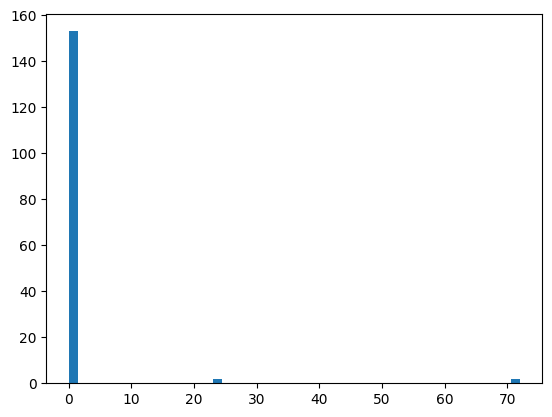

In [11]:
plt.hist(df['referencesNumber'], bins=50)
plt.show()

In [12]:
len(df[df['referencesNumber'] == 0]) / len(df)

0.9745222929936306

In [14]:
len(df[~df['datasetLanguage'].isnull()]) / len(df)

0.7643312101910829

In [15]:
len(df[~df['accessRights'].isnull()]) / len(df)

0.2229299363057325